
# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file_path = 'Housing.csv'
df = pd.read_csv(file_path)

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df_encoded = pd.get_dummies(df, drop_first=True)

# Normalizing numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print(df_encoded.head())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price      area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  13300000  1.046726  1.403419   1.421812  1.378217  1.517692             1   
1  12250000  1.757010  1.403419   5.405809  2.532024  2.679409             1   
2  12250000  2.218232  0.047278   1.421812  0.224410  1.517692             1   
3  12215000  1.083624  1.403419   1.421812  0.224410  2.679409             1   
4  11410000  1.046726  1.403419  -0.570187  0.224410  1.517692             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0

# Feature Engineering

In [2]:
# Creating interaction terms
df_encoded['area_bedrooms'] = df_encoded['area'] * df_encoded['bedrooms']
df_encoded['area_bathrooms'] = df_encoded['area'] * df_encoded['bathrooms']
df_encoded['bedrooms_bathrooms'] = df_encoded['bedrooms'] * df_encoded['bathrooms']

# Adding polynomial features
df_encoded['area_squared'] = df_encoded['area'] ** 2
df_encoded['bedrooms_squared'] = df_encoded['bedrooms'] ** 2
df_encoded['bathrooms_squared'] = df_encoded['bathrooms'] ** 2

# Log transformation of the price
df_encoded['log_price'] = np.log(df_encoded['price'])

# Dropping the original price column
df_encoded = df_encoded.drop('price', axis=1)

print(df_encoded.head())


       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692             1   
1  1.757010  1.403419   5.405809  2.532024  2.679409             1   
2  2.218232  0.047278   1.421812  0.224410  1.517692             1   
3  1.083624  1.403419   1.421812  0.224410  2.679409             1   
4  1.046726  1.403419  -0.570187  0.224410  1.517692             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  \
0             1                                0   
1             0   

# Data Visualization

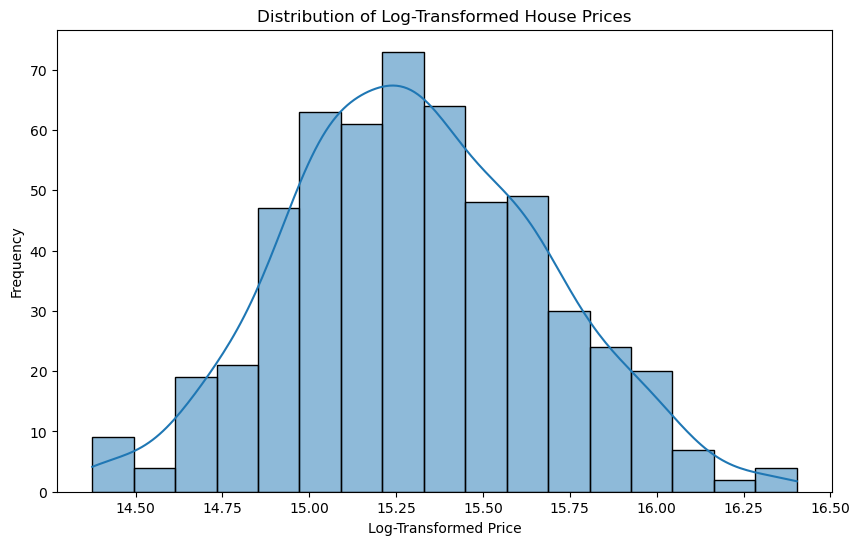

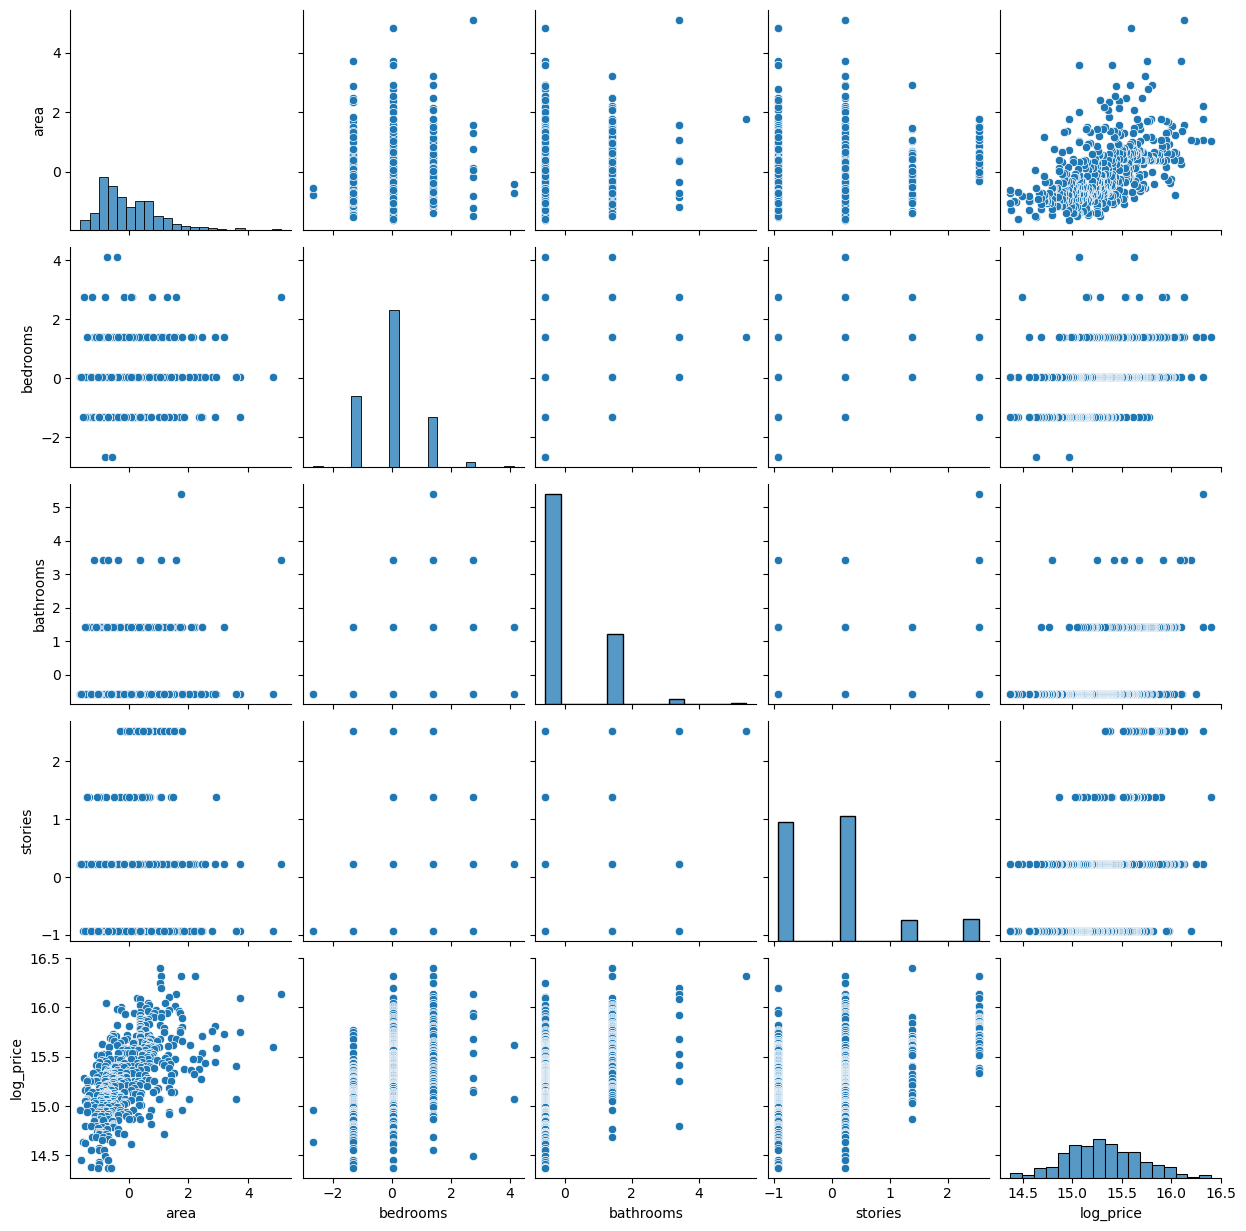

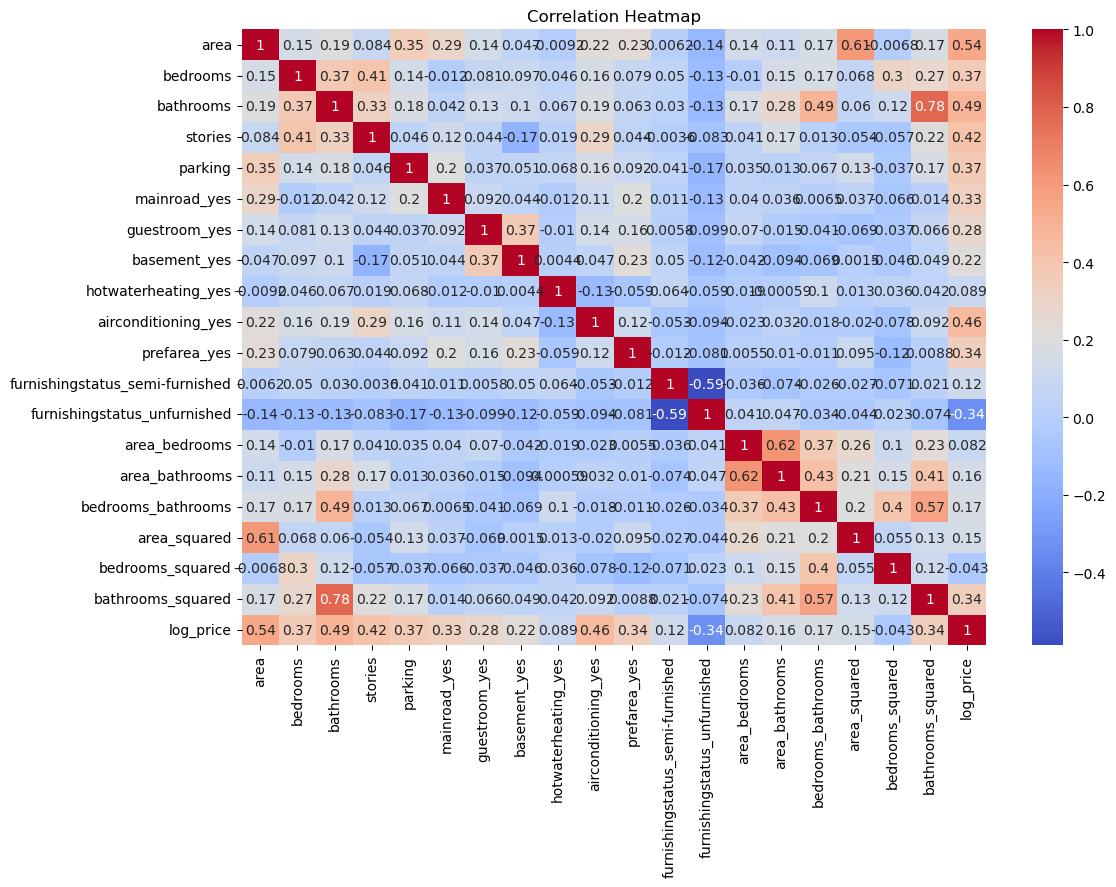

In [3]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['log_price'], kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()

# Pair plot of some numerical features
sns.pairplot(df_encoded[['area', 'bedrooms', 'bathrooms', 'stories', 'log_price']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Model Training and Evaluation

Mean Squared Error: 0.0632095136454726
R-squared: 0.6726400721355358


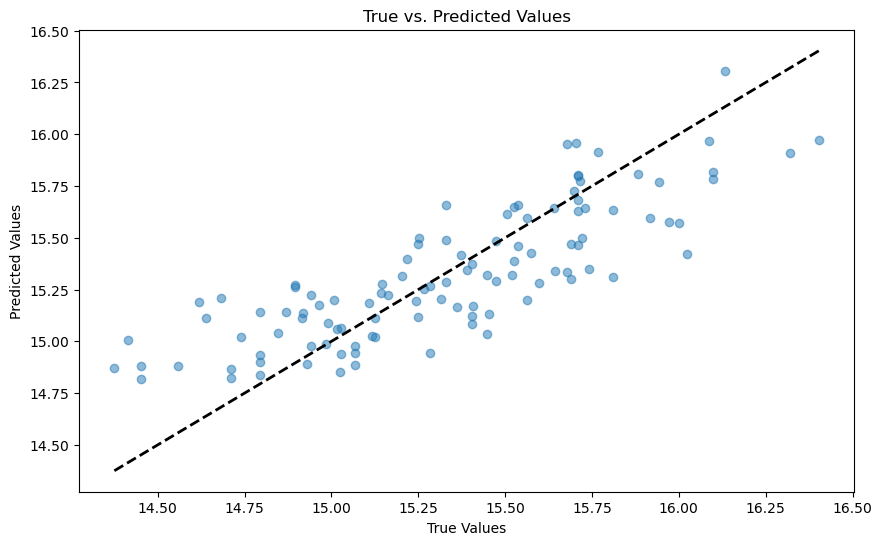

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df_encoded.drop('log_price', axis=1)
y = df_encoded['log_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization: Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()
